### FMB552 금융 데이터베이스 실습 과제 - Week2, #1
### 우지환(학번 20204654)

### 1. 소괄호, 중괄호, 대괄호 차이
### 소괄호

In [1]:
(5 + 2) * 3

21

In [2]:
def f(x, y):
    return x + y
f(2, 3)

5

### 중괄호

In [3]:
print('{} says {}'.format('Bob', 'hello'))

Bob says hello


#### dict(dictionary) 변수선언

In [4]:
person = {
    'name':'Bob',
    'gender': 'male',
    'age' : 32
}

In [5]:
print('{} is a {} and {} years old'.format(
    person['name'], person['gender'], person['age']
))

Bob is a male and 32 years old


### 대괄호

In [6]:
data = [1, 2, 3, 4, 5]

In [7]:
for x in data:
    print('x={}'.format(x))

x=1
x=2
x=3
x=4
x=5


#### indexing / slicing

In [8]:
data[2]

3

In [9]:
data[2:4]

[3, 4]

In [10]:
data[2:]

[3, 4, 5]

In [11]:
data[:3]

[1, 2, 3]

In [12]:
data[:-1]

[1, 2, 3, 4]

In [13]:
temp = 'abcde {} abcde'.format('hello') # 문자열의 멤버 함수, format안의 파라메터가 중괄호 속으로 들어감

In [14]:
print(temp)

abcde hello abcde


In [15]:
type(data)

list

In [16]:
type(data[2])

int

### 2. Credit Risk 평가하기

In [17]:
face = 1000
T = 5
c = 0.05
r = 0.05
recovery = 0.6
prob_default =0.01

In [18]:
def compute_npv_with_credit_risk(tau):
    if tau == 0:
        return face
    v1 = c * face + compute_npv_with_credit_risk(tau-1)
    v2 = recovery * face
    expected = (1 - prob_default) * v1 + prob_default * v2
    npv = expected / (1+r)
    
    return npv

In [19]:
compute_npv_with_credit_risk(T)

980.8844191110848

In [20]:
def compute_npv_with_credit_risk2(tau, p_default):
    if tau == 0:
        return face
    v1 = c * face + compute_npv_with_credit_risk2(tau-1, p_default)
    v2 = recovery * face
    expected = (1 - p_default) * v1 + p_default * v2
    npv = expected / (1+r)
    
    return npv

In [21]:
for p in [0, 0.01, 0.02, 0.03]:
    npv = compute_npv_with_credit_risk2(T, p)
    print('Default probability: {:.0f}%, NPV: {:.2f}'.format(p * 100, npv))

Default probability: 0%, NPV: 1000.00
Default probability: 1%, NPV: 980.88
Default probability: 2%, NPV: 962.49
Default probability: 3%, NPV: 944.79


In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

In [24]:
steps = 100
probs  = [ x / steps * 0.1 for x in range(steps)]

In [25]:
prices = [compute_npv_with_credit_risk2(T, p) for p in probs]

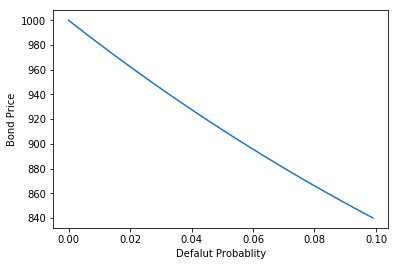

In [26]:
plt.plot(probs, prices)
plt.xlabel('Defalut Probablity')
plt.ylabel('Bond Price')
plt.show()